# Homework 2: Control Structures

Ana Lyons  
101

** Submit this notebook to bCourses to receive credit for this assignment. **

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook [email_name]_HW02.ipynb, where [email_name] is the part of your UCB email address that precedes "@berkeley.edu" 

## Problem 1: Binomial Coefficients

[Adapted from Newman, Exercise 2.11] The binomial coefficient $n \choose k$ is an integer equal to

$$ {n \choose k} = \frac{n!}{k!(n-k)!} = \frac{n \times (n-1) \times (n-2) \times \cdots \times (n-k + 1)}{1 \times 2 \times \cdots \times k} $$

when $k \geq 1$, or ${n \choose 0} = 1$ when $k=0$. (The special case $k=0$ can be included in the general definition by using the conventional definition $0! \equiv 1$.)

1. Write a function `factorial(n)` that takes an integer $n$ and returns $n!$ as an integer. It should yield $1$ when $n=0$. You may assume that the argument will also be an integer greater than or equal to 0.

1. Using the form of the binomial coefficient given above, write a function `binomial(n,k)` that calculates the binomial coefficient for given $n$ and $k$. Make sure your function returns the answer in the form of an integer (not a float) and gives the correct value of 1 for the case where $k=0$. (Hint: Use your `factorial` function from Part 1.)

1. Using your `binomial` function, write a function `pascals_triangle(N)` to print out the first $N$ lines of "Pascal's triangle" (starting with the $0$th line). The $n$th line of Pascal's triangle contains $n+1$ numbers, which are the coefficients $n \choose 0$, $n \choose 1$, and so on up to $n \choose n$. Thus the first few lines are
        1
        1 1
        1 2 1
        1 3 3 1
        1 4 6 4 1     
This would be the result of `pascals_triangle(5)`. Print the first 15 rows of Pascal's triangle.
        
1. The probability that an ubiased coin, tossed $n$ times, will come up heads $k$ times is ${n \choose k} / 2^n$. (Or instead of coins, perhaps you'd prefer to think of spins measured in a [Stern-Gerlach experiment](https://en.wikipedia.org/wiki/Stern%E2%80%93Gerlach_experiment).)
    - Write a function `heads_exactly(n,k)` to calculate the probability that a coin tossed $n$ times comes up heads exactly $k$ times.
    - Write a function `heads_atleast(n,k)` to calculate the probability that a coin tossed $n$ times comes up heads $k$ or more times.
    - Print the probabilities (to three decimal places) that a coin tossed 100 times comes up heads exactly 60 times, and at least 60 times. You should print corresponding statements with the numbers so it is clear what they each mean.

1. Along with the printed statements from Part 4, have your code generate and display two labelled plots for `heads_exactly(n,k)` and `heads_atleast(n,k)` with $n=100$. You should have values of $k$ on the $x$-axis, and probabilities on the $y$-axis. (Note that $k$ only takes integer values from 0 to $n$, inclusive. Your plots can be connected curves or have discrete markers for each point; either is fine.)

#### Output

To summarize, your program should output the following things:

1. The first 15 rows of Pascal's triangle
1. The probabilities (to three decimal places) that a coin tossed 100 times comes up heads exactly 60 times, and at least 60 times, with corresponding statements so it is clear what each number signifies.
1. Two labeled plots for `heads_exactly(n,k)` and `heads_atleast(n,k)` with $n=100$, representing probability distributions for 100 coin flips.

#### Reminder

Remember to write informative doc strings, comment your code, and use descriptive function and variable names so others (and future you) can understand what you're doing!


In [2]:
import numpy as np
import matplotlib.pyplot as plt

The probability that a coin flipped 100 times will come up heads exactly 60 times is:  0.011
The probability that a coin flipped 100 times will come up heads 60 times or more is:  0.028


Text(0.5,1,'Probability Distribution for Least Number of Coin Flips')

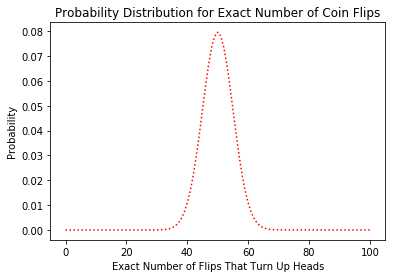

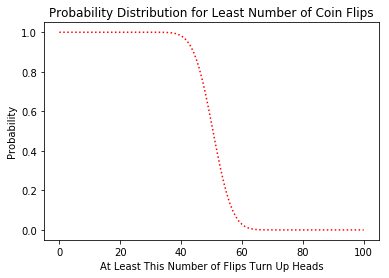

In [7]:
def factorial(n):
    '''Takes an integer and outputs the factorial of that number, also an integer.
    Factorial is defined as the product of all the integers up to and including the input.'''
    if n == 0:
        return 1   #takes care of case that if n = 0, n! = 1
    else:          #sets initial product = 1, and then the loop multiplies all the integers up to n together 
        product = 1 
        for i in range(1, n+1):
            product *= i
        return int(product) #returns the final product as an integer

def binomial(n, k):
    '''Takes two integer inputs and outputs the binomial coefficient (n choose k). Output is also an integer.
    Formula is given by n!/k!(n-k)!.'''
    binomial = factorial(n)/(factorial(k)*factorial(n-k)) #uses formula with factorial function defined above
    return int(binomial)

def pascals_triangle(N):
    '''Prints the first N rows of pascal's triangle, which is given by the different binomial coefficients.
    Given some n, the coefficients in the row will be the result of binomial(n, k) for 1< k <= n.'''
    for i in range (N):      #the loop iterates over each integer up to N, creating its own row
        row = []              
        for k in range(i+1):   #this loop inside calculates the different coefficients for each row          
            row.append(binomial(i, k))
        print(*row)
    
def heads_exactly(n, k):
    '''Calculates the probability that a coin flipped n times will come up heads k times. 
    Formula used: (n choose k)/2**n. 
    Inputs are integers. Output is a float.'''
    chance = binomial(n, k)/2**n
    return chance

def heads_atleast(n, k):
    '''calculates the probability that a coin flipped n times will come up heads k or more times.
    Formula: (n choose k)/2**n.
    Inputs are integers. Output is a float.'''
    sum_chance = 0
    for i in range(k, n+1):
        sum_chance += heads_exactly(n, i)
    return sum_chance

print('The probability that a coin flipped 100 times will come up heads exactly 60 times is: ', round(heads_exactly(100,60), 3))
print('The probability that a coin flipped 100 times will come up heads 60 times or more is: ', round(heads_atleast(100,60), 3))

#creates the first plot, for the exact function
x = range(0,101)
y_1 = list(map(lambda z: heads_exactly(100, z), x)) #maps the heads_exactly function to each value in the x array
plt.plot(x, y_1, 'r:')
plt.xlabel('Exact Number of Flips That Turn Up Heads')
plt.ylabel('Probability')
plt.title('Probability Distribution for Exact Number of Coin Flips')

#starts new plot for the atleast function
plt.figure()
y_2 = list(map(lambda z: heads_atleast(100, z), x))
plt.plot(x, y_2, 'r:')
plt.xlabel('At Least This Number of Flips Turn Up Heads')
plt.ylabel('Probability')
plt.title('Probability Distribution for Least Number of Coin Flips')



## Problem 2: Semi-Empirical Mass Formula

[Adapted from Newman, Exercise 2.10] In nuclear physics, the semi-empirical mass formula is a formula for calculating the approximte nuclear binding energy $B$ of an atomic nucleus with atomic number $Z$ and mass number $A$:

$$ B = a_1 A - a_2 A^{2/3} - a_3 \frac{Z^2}{A^{1/3}} - a_4 \frac{(A-2Z)^2}{A} + \frac{a_5}{A^{1/2}}, $$

where, in units of millions of electron volts (MeV), the constants are $a_1 = 15.67$, $a_2 = 17.23$, $a_3 = 0.75$, $a_4 = 93.2$, and

$$ a_5 = \begin{cases}
0 & \text{if } A \text{ is odd,}\\
12.0 & \text{if } A \text{ and } Z \text{ are both even,} \\
-12.0 & \text{if } A \text{ is even and } Z \text{ is odd.}
\end{cases} $$

1. Write a function `binding_energy(A, Z)` that takes as its input the values of $A$ and $Z$, and returns the binding energy for the corresponding atom. Check your function by computing the binding energy of an atom with $A = 58$ and $Z = 28$. (Hint: The correct answer is around 490 MeV.)

1. Write a function `binding_energy_per_nucleon(A, Z)` which returns not the total binding energy $B$, but the binding energy per nucleon, which is $B/A$.

1. Write a function `max_binding_energy_per_nucleon(Z)` which takes as input just a single value of the atomic number $Z$ and then goes through all values of $A$ from $A = Z$ to $A = 3Z$, to find the one that has the largest binding energy per nucleon. This is the most stable nucleus with the given atomic number. Have your function return the value of $A$ for this most stable nucleus and the value of the binding energy per nucleon.

1. Finally, use the functions you've written to write a program which runs through all values of $Z$ from 1 to 100 and prints out the most stable value of $A$ for each one. At what value of $Z$ does the maxium binding energy per nucleon occur? (The true answer, in real life, is $Z = 28$, which is nickel. You should find that the semi-empirical mass formula gets the answer roughly right, but not exactly.)

#### Output

Your final output should look like

    Z =   1 : most stable A is 2
    Z =   2 : most stable A is 4
          .
          .
          .
    Z =  10 : most stable A is 20
    Z =  11 : most stable A is 23
          .
          .
          .
    Z = 100 : most stable A is 210
    The most stable Z is ____
    with binding energy per nucleon ____

With the ...'s and ____'s replaced with your results. The binding energy per nucleon in the last line should have three decimal places.

For maximum readability, you should include the extra whitespace around the $Z =$ numbers so everything lines up, as shown. (To remember the `print` formatting syntax to do this, see Table 1.1 in the Ayars text.)

#### Reminder

Remember to write informative doc strings, comment your code, and use descriptive function and variable names so others (and future you) can understand what you're doing!


In [42]:
a1 = 15.67
a2 = 17.23
a3 = 0.75
a4 = 93.2

def binding_energy(A, Z):
    '''Takes inputs A (mass number) and Z (atomic number) and returns the binding energy of the atomic nucleus.
    A and Z are integers, the output is a float. Units of MeV.'''
    
    #checks which value of a5 should be used for the calculation
    if A%2 != 0:
        a5 = 0
    elif A%2 == 0 and Z%2 == 0:
        a5 = 12
    elif A%2 == 0 and Z%2 != 0:
        a5 = -12
    
    #splits up the calculation into smaller chunks, and then sums them together into the final binding energy
    B1 = a1*A
    B2 = a2*(A**(2/3))
    B3 = a3*(Z**2/A**(1/3))
    B4 = a4*((A - 2*Z)**2/A)
    B5 = a5/A**(1/2)
    B = B1 - B2 - B3 - B4 + B5
    
    return B

def binding_energy_per_nucleon(A, Z):
    '''Function takes inputs of A (mass number) and Z (atomic number) to return the binding energy of the nucleus
    per nucleon. A and Z are integers, the output is a float. Units of MeV. Uses the binding_energy(A, Z) function.'''
    
    return binding_energy(A, Z)/A

def max_binding_energy_per_nucleon(Z):
    '''Function that takes input of Z (atomic number) and checks all mass numbers from Z to 3Z for their binding 
    energy. Function returns the mass number which gives the max energy and the energy as a list ([A_max, energy]).
    Uses binding_energy_per_nucleon function.
    Input: integer
    Output: list ([integer, float])'''
    
    #creates a list of energies, adds each calculation to that list for each A
    energies = []
    for A in range(Z, 3*Z+1):
        B = binding_energy_per_nucleon(A, Z)
        energies.append(B)
    
    energy_max = max(energies)             #finds maximum energy
    A_max = Z + energies.index(energy_max) #finds index of the max energy, converts it to A (A = Z + index)
    return [A_max, energy_max]

#calculates most stable A value for each Z value
z_list = []
for Z in range(1, 101):
    z = Z
    a = max_binding_energy_per_nucleon(z)
    z_list.append(a[1])
    print('Z = {:>3d} : most stable A is {:d}'.format(z, a[0])) #formats answer so all Z values are aligned to the right

energy_z_max = max(z_list)
z_max = z_list.index(energy_z_max) + 1

print('The most stable Z is {:d} with a binding energy per nucleon {:.3f}'.format(z_max, energy_z_max))

    
    
    

Z =   1 : most stable A is 2
Z =   2 : most stable A is 4
Z =   3 : most stable A is 6
Z =   4 : most stable A is 8
Z =   5 : most stable A is 10
Z =   6 : most stable A is 12
Z =   7 : most stable A is 15
Z =   8 : most stable A is 16
Z =   9 : most stable A is 19
Z =  10 : most stable A is 20
Z =  11 : most stable A is 23
Z =  12 : most stable A is 24
Z =  13 : most stable A is 27
Z =  14 : most stable A is 28
Z =  15 : most stable A is 31
Z =  16 : most stable A is 32
Z =  17 : most stable A is 35
Z =  18 : most stable A is 36
Z =  19 : most stable A is 39
Z =  20 : most stable A is 41
Z =  21 : most stable A is 43
Z =  22 : most stable A is 46
Z =  23 : most stable A is 47
Z =  24 : most stable A is 50
Z =  25 : most stable A is 51
Z =  26 : most stable A is 54
Z =  27 : most stable A is 55
Z =  28 : most stable A is 58
Z =  29 : most stable A is 59
Z =  30 : most stable A is 62
Z =  31 : most stable A is 63
Z =  32 : most stable A is 66
Z =  33 : most stable A is 69
Z =  34 : most

## Problem 3: Particle in a Box

[Adapted from Ayars, Problem 3-1] The energy levels for a quantum particle in a three-dimensional rectangular box of dimensions $\{L_1, L_2, \text{ and } L_3\}$ are given by

$$ E_{n_1, n_2, n_3} = \frac{\hbar^2 \pi^2}{2m} \left[ \frac{n_1^2}{L_1^2} + \frac{n_2^2}{L_2^2} + \frac{n_3^2}{L_3^2} \right] $$

where the $n$'s are integers greater than or equal to one. Your goal is to write a program that will calculate, and list in order of increasing energy, the values of the $n$'s for the 10 lowest *different* energy levels, given a box for which $L_2 = 2L_1$ and $L_3 = 4L_1$.

Your program should include two user-defined functions that you may find helpful in accomplishing your goal:

1. A function `energy(n1, n2, n3)` that takes integer values $n_1$, $n_2$, and $n_3$, and computes the corresponding energy level in units of $\hbar^2 \pi^2/2 m L_1^2$.

1. A function `lowest_unique_K(K, List)` which takes a positive integer $K$ and a list of real numbers `List`, and returns an ordered (ascending) list of the lowest $K$ unique numbers in the list `List`. For instance, `lowest_unique_K(3, [-0.5, 3, 3, 2, 6, 7, 7])` would return `[-0.5, 2, 3]`. The function should not modify the original list `List`.
    - As with most programming puzzles, there are several ways to write this function. Depending on how you do it, you may or may not find it helpful to recall "Program 9" in the Workshop's "Debugging Practice" (about copying lists), or to Google how to "sort" lists, or how to "del" or "pop" items out of lists.
    
You may also wish to make other user-defined functions depending on how you go about solving the problem. In fact, if you find some clever way to solve the problem that doesn't use `lowest_unique_K`, that is fine too! (You still need to write `lowest_unique_K`, though.) But whatever you do, be sure to comment your code clearly!

#### Output

Your final output should look like this (though with different numbers, and not necessarily the same number of lines):

    energy, n1, n2, n3
    (0.4375, 1, 1, 1)
    (0.625, 1, 2, 1)
    (0.8125, 2, 1, 1)
    (0.9375, 1, 3, 1)
    (1.0, 2, 2, 1)
    (1.1875, 1, 1, 2)
    (1.3125, 2, 3, 1)
    (1.375, 1, 2, 2)
    (1.375, 1, 4, 1)
    (1.4375, 3, 1, 1)
    (1.5625, 2, 1, 2)

Notice how there are only 10 unique energies listed, but more than 10 lines. Each line could also have brackets instead of parentheses if you prefer, like this: `[0.4375, 1, 1, 1]`.

#### Reminder

Remember to write informative doc strings, comment your code, and use descriptive function and variable names so others (and future you) can understand what you're doing!

#### Just for fun

If you'd like, write a function `print_table(list_of_lists)` that takes  a list of lists (or a list of tuples) and prints them in a nicely aligned table. Feel free to Google to get ideas on how to do this. Try to get your function to produce something like

    energy  n1 n2 n3
    0.4375  1  1  1
    0.625   1  2  1
    0.8125  2  1  1
    0.9375  1  3  1
    1.0     2  2  1
    1.1875  1  1  2
    1.3125  2  3  1
    1.375   1  2  2
    1.375   1  4  1
    1.4375  3  1  1
    1.5625  2  1  2

In [10]:
def energy(n1, n2, n3):
    '''Function takes 3 integer inputs, n1, n2, n3 and returns the energy level for a quantum particle in a box
    with dimensions 2L1 = L2, 4L3 = L1. Energy level is given in units of (h**2)(pi**2)/(2mL1**2), h = Planck constant,
    L1 is one dimension of the box. 
    Inputs: 3 integers
    Output: float'''
    energy_level = (16*n1**2 + 4*n2**2 + n3**2)/16
    return energy_level

def lowest_unique_K(K, List):
    '''Gives the lowest unique K values in a given list. Uses the sorted() function to sort the list.
    Inputs: Integer, List
    Output: List of length K. Each element in output list is also a list.'''
    unique_List = []
    #checks if the value of List is already in unique_List. If true, it ignores that value. If not, it adds it
    for i in List:
        if i in unique_List:
            continue
        else:
            unique_List.append(list(i))
    #puts all the values of the unique list in ascending order (makes sure to sort by the first value in component lists)
    #so that when it's used later, the sort sorts by order of ascending energies
    unique_List_sorted = sorted(unique_List, key= lambda energy: energy[0]) 
    return unique_List_sorted[0:K]  

def list_energy(n1, n2, n3):
    '''Takes the input and output from the energy() function and returns a list containing all 4.
    Input: n1, n2, n3
    Output: [energy(n1, n2, n3), n1, n2, n3] (a list)'''
    energy_list = [energy(n1, n2, n3), n1, n2, n3]
    return energy_list

#as the values of n increase, so does the energy. So checking n = range(10) should reasonably give at least the 10 smallest values.
n = range(1,10)
energy_master = []

#these 3 nested for loops make sure every combination of n1, n2, and n3 are checked for their energy value
#every energy and it's corresponding n values are added to a master list
for i in n:
    n1 = i
    for k in n:
        n2 = k
        for m in n:
            energy_master.append(list_energy(n1, n2, m))
        
lowest_energies = lowest_unique_K(10, energy_master)

print('{} {} {} {}'.format('energy', 'n1', 'n2', 'n3'))
for x in range(10):
    row = lowest_energies[x]
    row[0] = format(row[0], '<6')     #formats the energy values so they are all aligned
    for r in range(1, 4):             #makes sure n values are all aligned
        row[r] = format(row[r], '>2')
    print(*row)                       #prints lists without brackets and commas

energy n1 n2 n3
1.3125  1  1  1
1.5     1  1  2
1.8125  1  1  3
2.0625  1  2  1
2.25    1  1  4
2.25    1  2  2
2.5625  1  2  3
2.8125  1  1  5
3.0     1  2  4
3.3125  1  3  1
